In [36]:
#setup
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import gensim

sns.set_theme()
plt.rcParams["figure.figsize"] = (10,8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [37]:
from main import nlp_pipeline_result

In [5]:
#data_ner = nlp_pipeline_result(disable_ner = False)
#data.to_csv('data/data_ner.csv')

data_non_ner = nlp_pipeline_result()
data_non_ner['n_lemmas'] = data_non_ner['Lemmas'].str.split().str.len()

#data_non_ner.to_csv('data/data.csv')

In [42]:
data = pd.read_csv('data/data.csv')

In [52]:
data

,Unnamed: 0,Original Tweets,Parsed Tweets,Author,Party,Lemmas,n_lemmas
0,0,El Centro de Robótica e Inteligencia Artificia...,El Centro de Robótica e Inteligencia Artificia...,José Luis Ábalos Meco,PSOE,Centro Robótica Inteligencia Artificial Alcáza...,22
1,1,Día de homenaje a los españoles deportados y f...,Día de homenaje a los españoles deportados y f...,José Luis Ábalos Meco,PSOE,homenaje español deportado fallecido campo con...,16
2,2,Mi agradecimiento a los interventores y apoder...,Mi agradecimiento a los interventores y apoder...,José Luis Ábalos Meco,PSOE,agradecimiento interventor apoderado represent...,14
3,3,Hemos autorizado las obras de un puente móvil ...,Hemos autorizado las obras de un puente móvil ...,José Luis Ábalos Meco,PSOE,autorizar obra puente móvil conexión ferroviar...,17
4,4,La estación de Santa Justa cumple 30 años con ...,La estación de Santa Justa cumple 30 años con ...,José Luis Ábalos Meco,PSOE,estación Santa Justa cumplir año millón usuari...,22
...,...,...,...,...,...,...,...
14779,14779,Hoy en la tertulia de @radioclubSER hemos habl...,Hoy en la tertulia de hemos hablado sobre el d...,Ana María Zurita Expósito,PP,tertulia hablar desastre política inmigración ...,13
14780,14780,🔵Los diputados canarios del @GPPopular hemos r...,🔵Los diputados canarios del PP hemos registrad...,Ana María Zurita Expósito,PP,diputado canario PP registrar pregunta Gobiern...,12
14781,14781,🔵Ayer mantuvimos una reunión con @pp_icod para...,🔵Ayer mantuvimos una reunión con para ponernos...,Ana María Zurita Expósito,PP,mantuvimos reunión poner yo situación actual p...,11
14782,14782,"📻 Mañana, a partir de las 10:00h, participo en...","📻 Mañana, a partir de las 10:00h, participo en...",Ana María Zurita Expósito,PP,participo tertulia compañero Parlamento escúch...,6


In [44]:
#for i in range(0,50,10):
 # display(data[i:i+10])

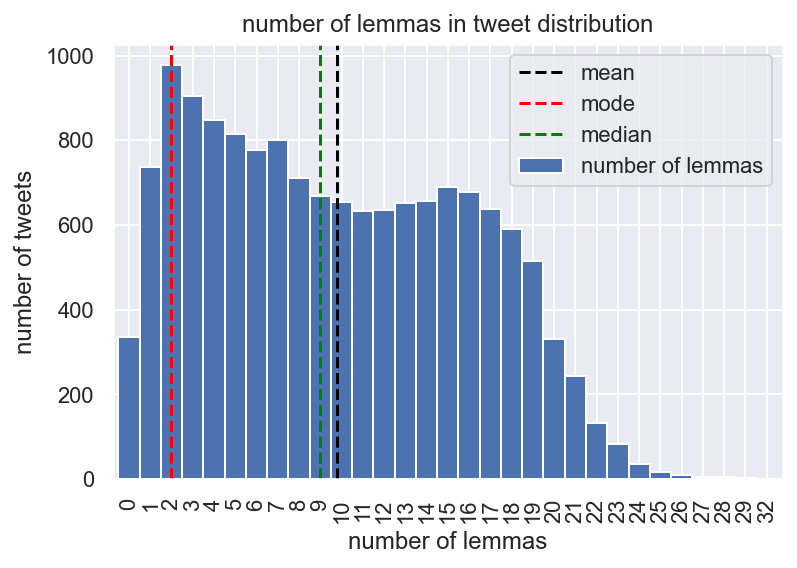

In [88]:
plt.figure()
data['n_lemmas'].value_counts().sort_index().plot(kind="bar",width=1,label='number of lemmas')
plt.axvline(x = data['n_lemmas'].mean(),label='mean',color = 'black',linestyle = '--')
plt.axvline(x = data['n_lemmas'].mode()[0],label='mode',color = 'red',linestyle = '--')
plt.axvline(x = data['n_lemmas'].median(),label='median',color = 'green',linestyle = '--')
plt.legend()
plt.title('number of lemmas in tweet distribution')
plt.xlabel('number of lemmas')
plt.ylabel('number of tweets')
plt.show()

In [14]:
tweets_corpus = data_non_ner["Lemmas"].tolist()
tweets_corpus = list(set(tweets_corpus))
tweets_corpus = [el.split() for el in tweets_corpus]

display(tweets_corpus)

[[],
 ['elección',
  'Andalucía',
  'Viviendas',
  'provocar',
  'elección',
  'País',
  'Vasco',
  'Sestao',
  'provocar',
  'elección',
  'Cataluña',
  'Vic',
  'provocar',
  'elección',
  'Madrid',
  'Vallecas',
  'provocar',
  'elección',
  'sitio',
  'presentar',
  'Vox',
  'provocar'],
 ['quedar', 'mejor', 'notar'],
 ['PSOE',
  'incluir',
  'sanidad',
  'oposición',
  'rotundo',
  'cordón',
  'sanitario',
  'decir',
  'compañera',
  'cordón',
  'democrático',
  'PSOE'],
 ['vivir',
  'semana',
  'Congreso',
  'Diputados',
  'aislado',
  'constante',
  'humillar',
  'millón',
  'español',
  'votar',
  'deber',
  'servimos',
  'diputado'],
 ['leeré'],
 ['oportunidades',
  'VOTA',
  'mayo',
  'merecer',
  'gobierno',
  'preocupar',
  'madrileño',
  'as',
  'sur'],
 ['fatal', 'fatal'],
 ['Falcon', 'patear'],
 ['charla',
  'enriquecedoro',
  'animar',
  'leáis',
  'libro',
  'obra',
  'título',
  'representar',
  'Teatro',
  'Infanta',
  'Isabel',
  'Madrid',
  'mayo'],
 ['lectura', 'b

In [26]:
gensim.corpora.dictionary

<module 'gensim.corpora.dictionary' from 'd:\\universidad\\projects\\nlp-with-spanish-politicians-tweets\\venv\\lib\\site-packages\\gensim\\corpora\\dictionary.py'>

In [28]:
token_dic = gensim.corpora.Dictionary(tweets_corpus)

# Filter token dictionary

no_below = 5  # Minimum number of documents to keep a term in the dictionary
no_above = .4  # Maximum proportion of documents in which a term can appear to be kept in the dictionary


# BOW: Transform list of tokens into list of tuples (token id, token # of occurrences)

tweets_corpus_bow = [token_dic.doc2bow(doc) for doc in tweets_corpus]

tweets_corpus_bow

[[],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 5),
  (11, 1),
  (12, 5),
  (13, 1)],
 [(14, 1), (15, 1), (16, 1)],
 [(17, 2),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1)],
 [(27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(40, 1)],
 [(41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1)],
 [(50, 2)],
 [(51, 1), (52, 1)],
 [(2, 1),
  (45, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1)],
 [(64, 1), (65, 1), (66, 1)],
 [(2, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1)],
 [(81, 1), (82, 1)],
 [(16, 1), (83, 1), (84, 1), (85, 1)],
 [(70, 1), (86, 1)],
 

In [34]:
from gensim.models.wrappers import LdaMallet
import os

#os.environ['MALLET_HOME'] = 'mallet-2.0.8'
mallet_path = 'mallet-2.0.8/bin/mallet'

ldamallet = LdaMallet(mallet_path, corpus=tweets_corpus_bow, num_topics=20, id2word=token_dic, alpha=5, iterations=100)

CalledProcessError: Command 'mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input C:\Users\chave\AppData\Local\Temp\fdcc3b_corpus.txt --output C:\Users\chave\AppData\Local\Temp\fdcc3b_corpus.mallet' returned non-zero exit status 1.